In [2]:
# Change Working Directory To Allow knn Imports
import os 
os.chdir('../')

In [3]:
from knn.k_nearest_neighbors import KNNClassification
import numpy as np
import matplotlib.pyplot as plt

## MNIST Data

In [44]:
mnist_data = np.load('./sample_data/mnist/mnist_data.npz')
train_data = mnist_data['train_data']
test_data = mnist_data['test_data']

# Subset Data If Desired
test_labels = test_data[:100, 0]
test_data = test_data[:100, 1:].astype(np.float)
train_labels = train_data[:, 0]
train_data = train_data[:, 1:].astype(np.float)

In [45]:
knn = KNNClassification(k=5, use_tree=True, tree_leaf_size=30, metric="euclidean")
knn.train(train_labels, train_data)

In [46]:
%timeit test = knn.predict(test_data)

5.8 s ± 38.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
knn = KNNClassification(k=5, metric="euclidean")
knn.train(train_labels, train_data)

In [48]:
%timeit test = knn.predict(test_data)

4.64 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Random Data

In [25]:
X = np.random.random((10000, 2))

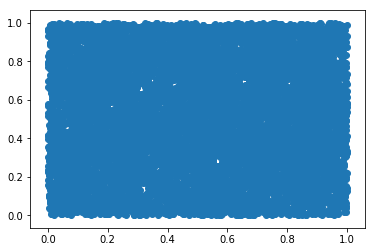

In [53]:
%matplotlib inline

fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1])

plt.show()

In [28]:
knn = KNNClassification(k=5, use_tree=True, tree_leaf_size=20, metric="euclidean")
knn.train(np.arange(10000), X)

In [29]:
%timeit test = knn.predict(X)

785 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
knn = KNNClassification(k=5, metric="euclidean")
knn.train(np.arange(10000), X)

In [31]:
%timeit test = knn.predict(X)

2.1 s ± 45.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Structured Data

In [13]:
points_per_region = 200
number_of_regions = 16

random_data = np.empty((points_per_region * number_of_regions,2))
region = 0

for i in range(-30, 30, 15):
    for j in range(-30, 30, 15):
        mu = np.array([i+7.5, j+7.5])
        sigma = np.array([[1, 0],[0, 1]])
        random_data[region:region+points_per_region] = np.random.multivariate_normal(mu, sigma, points_per_region)
        region = region + points_per_region

labels = np.repeat(np.arange(number_of_regions), points_per_region)

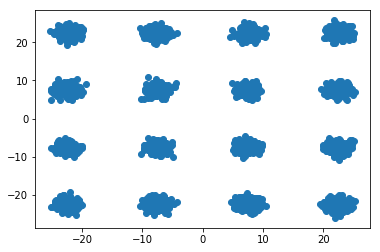

In [14]:
%matplotlib inline

fig, ax = plt.subplots()
plt.scatter(random_data[:, 0], random_data[:, 1])

plt.show()

In [51]:
knn = KNNClassification(k=5, use_tree=True, tree_leaf_size=20, metric="euclidean")
knn.train(labels, random_data)
%timeit predictions = knn.predict(random_data)

59.9 ms ± 452 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
knn2 = KNNClassification(k=5, metric="euclidean")
knn2.train(labels, random_data)
%timeit predictions = knn2.predict(random_data)

153 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
